# Aim: 
To implement simple linear regression

Task 1:

1. Define two Numpy arrays x= [5,15,25,35,45,55] and y= [11,16,18,30,22,38].

2. Plot a scatter plot of x and y.

3. Compute the values of the coefficients of linear regression, b0 and b1.

4. Determine the value of r2.

5. Determine the predicted value of y for x=20.

6. Plot the regression line on the scatter plot.

Task 2:

1. Import LinearRegression from SKlearn.

2. Reshape x to make it two dimensional array.

3. Create a model for linear regression.

4. Train the model using model.fit

5. Determine the value of r2. Compare the value with the one obtained in task 1.

6. Determine the value of intercept (b0) and slope(b1). Compare the values as obtained from task 1.


Task 3:

1. Import sat_cgpa.csv into your notebooks.

2. Explore the dataset using head and describe.

3. Repeat steps 2 to 6 from task 2.

4. Import statsmodels.api.

5. Plot a scatter plot of SAT vs GPA.

6. Convert SAT into a two-dimensional array.

7. Use OLS function from statsmodels to fit the training data to the model.

8. Print the summary of the OLS regression model.

9. Interpret the results of OLS regression model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api
import pandas as pd
import seaborn as sns
import sklearn 

In [ ]:
x=np.array([5,15,25,35,45,55])
y=np.array([11,16,18,30,22,38])
z=x*y
x2=x**2
print(x2)
print(z)

[  25  225  625 1225 2025 3025]
[  55  240  450 1050  990 2090]


In [ ]:
sat_data = pd.read_csv("/content/sat_cgpa.csv")
print(sat_data)

     SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]


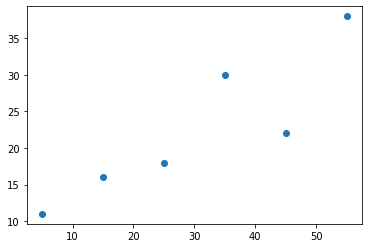

In [ ]:
plt.scatter(x,y)
plt.show()

In [ ]:
#y = b0 + b1*x 
xm=np.average(x)
ym=np.average(y)
zm=np.average(z)
x22=np.average(x2)
xd=xm**2
print(xd)
print(xm)
print(ym)
print(zm)
print(x22)

900.0
30.0
22.5
812.5
1191.6666666666667


In [ ]:
b1= (xm*ym-zm)/(xd-x22)
print(b1)

0.4714285714285713


In [ ]:
b0=ym- b1*xm
print(b0)

8.357142857142861


In [ ]:
y1 = b0 + b1*x
print(y1)
y2=b0 + b1*20
print(y2)

[10.71428571 15.42857143 20.14285714 24.85714286 29.57142857 34.28571429]
17.78571428571429


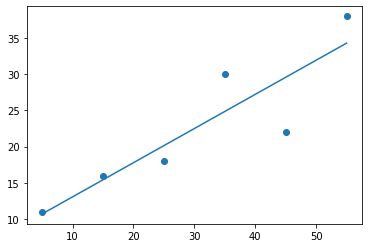

In [ ]:
plt.scatter(x,y)
plt.plot(x,y1)

In [ ]:
ssr=sum((y1-ym)**2)
sse=sum((y-y1)**2)
ssot=ssr +sse
print(ssr)
print(sse)
print(ssot)

388.9285714285712
102.57142857142854
491.4999999999998


In [ ]:
r2= 1-(sse/ssr)
print(r2)

0.7362718089990816


In [ ]:
#TASK 2
from sklearn.linear_model import LinearRegression 

In [ ]:
x = x.reshape((-1, 1))
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x, y)

LinearRegression()

In [ ]:
r2 = model.score(x, y)
print("r^2 (r square) is", r2)

r^2 (r square) is 0.7913094027030955


In [ ]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 8.357142857142856
slope: [0.47142857]


In [ ]:
#Task 3
data = pd.read_csv("/content/sat_cgpa.csv")
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [ ]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [ ]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [ ]:
import statsmodels.api as sm

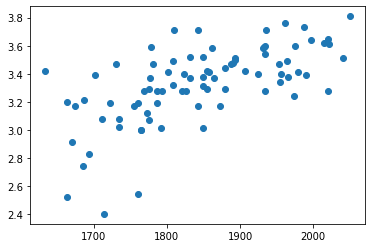

In [ ]:
x1= data['SAT']
y1= data ['GPA']
plt.scatter(x1,y1)

In [ ]:
print(x1.shape)

(84,)


In [ ]:
x1=sm.add_constant(x1)
x1

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [ ]:
results=sm.OLS(y1,x1).fit()

In [ ]:
results

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           7.20e-11
Time:                        05:49:23   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""